In [2]:
# preprocessing.ipynb

# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Load dataset (contoh dataset penyakit jantung dari UCI)
# Corrected URL for the heart disease dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# The dataset does not have a header, and the last column is the target.
# We need to manually specify column names and handle missing values ('?').
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, na_values="?")


print("Contoh Data:")
print(data.head())

# 3. Mengecek missing value
print("\nCek Missing Value:")
print(data.isnull().sum())

# Jika ada missing value, isi dengan mean (contoh)
# data.fillna(data.mean(numeric_only=True), inplace=True) # This might not be the best strategy for this dataset, let's keep it for now

# A better approach for this dataset might be to drop rows with missing values, especially in 'ca' and 'thal'
data.dropna(inplace=True)


# 4. Encoding kolom kategori (jika ada)
# In this dataset, 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', and 'target' are categorical/discrete.
# 'sex' is already 0 or 1, which is fine. Other categorical features might need one-hot encoding depending on the model.
# For simplicity, we will only encode 'sex' as it was in the original code and assume other discrete features are treated as numerical for now.
if "sex" in data.columns:
    # The sex column is already numerical (0 or 1), so LabelEncoder is not strictly necessary
    # If it were 'M'/'F', we would use LabelEncoder or OneHotEncoder
    pass # No encoding needed for 'sex' as it is already 0/1

# If you wanted to encode other categorical features, you would do it here, e.g., using pd.get_dummies()


# 5. Normalisasi / Standarisasi
# Applying StandardScaler to numerical columns. Be cautious when applying to discrete features.
scaler = StandardScaler()
# Identify numerical columns, excluding the target and potentially other discrete features if you don't want to scale them
# For this dataset, let's apply it to all except the target, as the original code did.
numeric_cols = data.columns.difference(["target"]) # Exclude target from scaling
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


print("\nData setelah Standarisasi:")
print(data.head())

# 6. Split data train & test
X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nJumlah Data Train:", X_train.shape)
print("Jumlah Data Test:", X_test.shape)

Contoh Data:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Cek Missing Value:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Data setelah Standarisasi:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.936181 

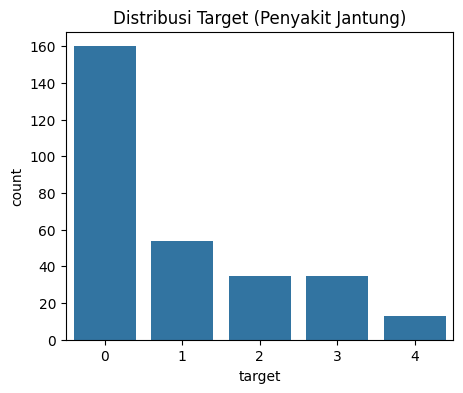

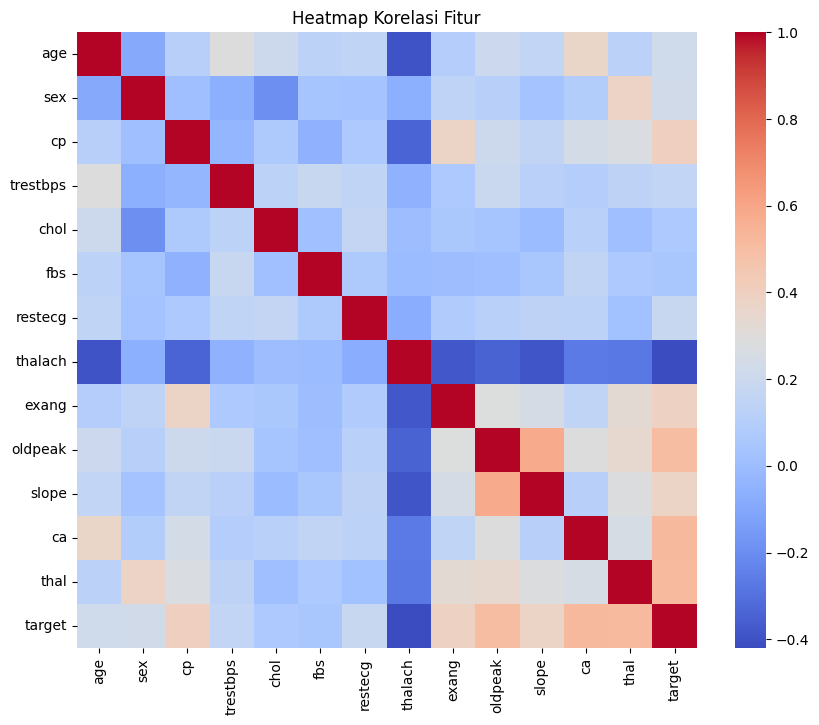

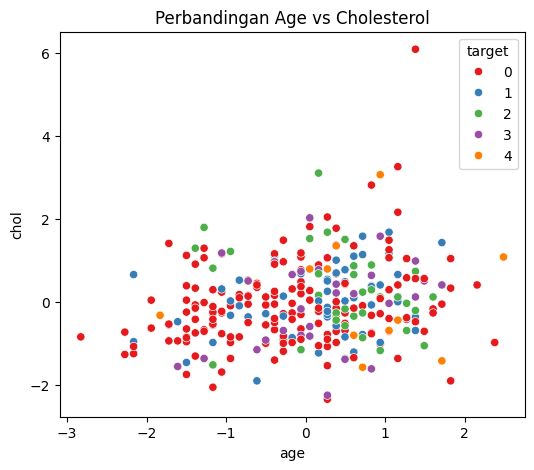

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi target
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Distribusi Target (Penyakit Jantung)")
plt.show()

# Heatmap korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Scatterplot contoh 2 fitur
plt.figure(figsize=(6,5))
sns.scatterplot(x=data["age"], y=data["chol"], hue=y, palette="Set1")
plt.title("Perbandingan Age vs Cholesterol")
plt.show()
